In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df=pd.read_csv('bikes.csv',parse_dates=['date'])
df

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.000000
1,2011-01-04,2.896673,54.267219,15.136882,108.000000
2,2011-01-05,4.235654,45.697702,17.034578,82.000000
3,2011-01-06,3.112643,50.237349,10.091568,88.000000
4,2011-01-07,2.723918,49.144928,15.738204,148.000000
...,...,...,...,...,...
186,2011-07-08,28.187490,63.618656,19.761499,692.000000
187,2011-07-09,29.070524,61.346450,21.121738,702.333333
188,2011-07-10,29.953558,59.074244,22.481976,712.666667
189,2011-07-11,30.836592,56.802038,23.842215,723.000000


In [3]:
#checking the datatypes
df.dtypes

date           datetime64[ns]
temperature           float64
humidity              float64
windspeed             float64
count                 float64
dtype: object

In [4]:
#checking null values in the datasets
df.isnull().sum()

date           0
temperature    0
humidity       0
windspeed      0
count          0
dtype: int64

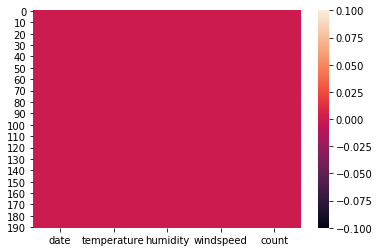

In [5]:
#checking whether the null value is present or not
sns.heatmap(df.isnull())

In [6]:
#from the dates we can count the monthly,yearly,daily count of bikes which help in analysing the data
df_dates=pd.DataFrame()
df_dates['month']=df['date'].dt.month_name()
df_dates['year']=df['date'].dt.year
df_dates['day']=df['date'].dt.day_name()
df_dates['count']=df['count']
df_dates

,month,year,day,count
0,January,2011,Monday,120.000000
1,January,2011,Tuesday,108.000000
2,January,2011,Wednesday,82.000000
3,January,2011,Thursday,88.000000
4,January,2011,Friday,148.000000
...,...,...,...,...
186,July,2011,Friday,692.000000
187,July,2011,Saturday,702.333333
188,July,2011,Sunday,712.666667
189,July,2011,Monday,723.000000


In [7]:
#checking the total number of distinct years
df_dates['year'].drop_duplicates()

0    2011
Name: year, dtype: int64

In [8]:
#making one more column which tell whether it is weekdays or weekend
df_dates['type of day']=np.where((df_dates['day']=='Sunday')|(df_dates['day']=='Saturday'),'Weekend','Weekdays')

In [9]:
df_dates

,month,year,day,count,type of day
0,January,2011,Monday,120.000000,Weekdays
1,January,2011,Tuesday,108.000000,Weekdays
2,January,2011,Wednesday,82.000000,Weekdays
3,January,2011,Thursday,88.000000,Weekdays
4,January,2011,Friday,148.000000,Weekdays
...,...,...,...,...,...
186,July,2011,Friday,692.000000,Weekdays
187,July,2011,Saturday,702.333333,Weekend
188,July,2011,Sunday,712.666667,Weekend
189,July,2011,Monday,723.000000,Weekdays


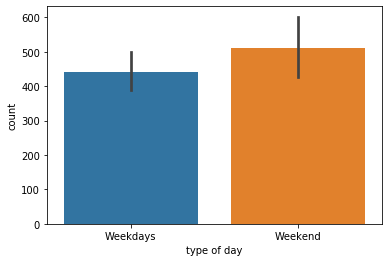

In [10]:
#let's make the barplot for average count during weekend and weekdays
sns.barplot(x='type of day',y='count',data=df_dates)
plt.show()

Observation: The count of bikes are more on weekdays.That means people are travelling more on weekend as compare to weekdays.

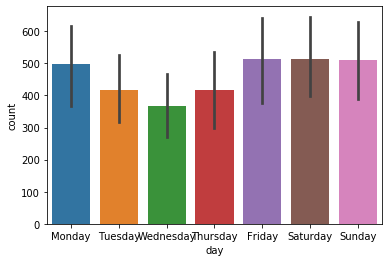

In [11]:
#average count during days of the week
sns.barplot(x='day',y='count',data=df_dates)
plt.show()

Observation: The above graph shows that the count of bikes are more on Monday, Friday, Saturday and Sunday where as the count is very less on wednesday.

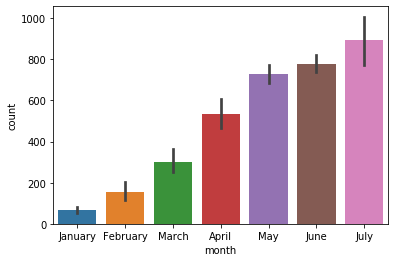

In [12]:
#average count during month of an year
sns.barplot(x='month',y='count',data=df_dates)
plt.show()

Observation: The above graph shows that the count is maximum in the month of july However minimum in the month of January. May be due to good climatic condition in july as compare to january people like to travel by bikes.

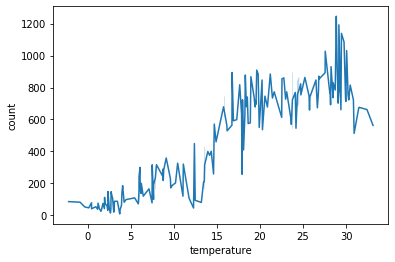

In [13]:
#using line plot from seaborn to check how temperature impacting the count
sns.lineplot(x='temperature',y='count',data=df)
plt.show()

Observation: The above graph show that the count of bike is more between the temerature of 27 to 30.That means that climatic condition is more favourable for bikes.

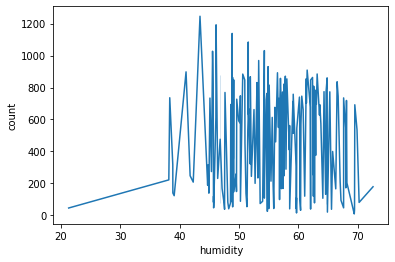

In [14]:
#using line plot from seaborn to check how humidity impacting the count
sns.lineplot(x='humidity',y='count',data=df)
plt.show()

Observation: It show that more the humidity less the count of bikes.

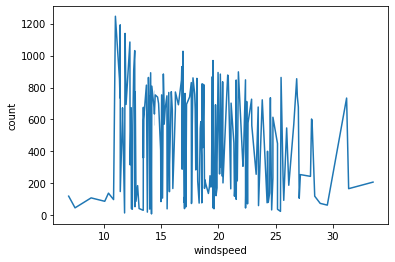

In [15]:
#using line plot from seaborn to check how windspeed impacting the count
sns.lineplot(x='windspeed',y='count',data=df)
plt.show()

Observation: This graph shows that at average wind speed the count of bikes are more.

In [16]:
#To check the skewness of data
df.skew()

temperature    0.053735
humidity      -0.417698
windspeed      0.341381
count          0.153032
dtype: float64

Observation: This shows that the data is not skewed because the exceptable level of skewness is 0.55.

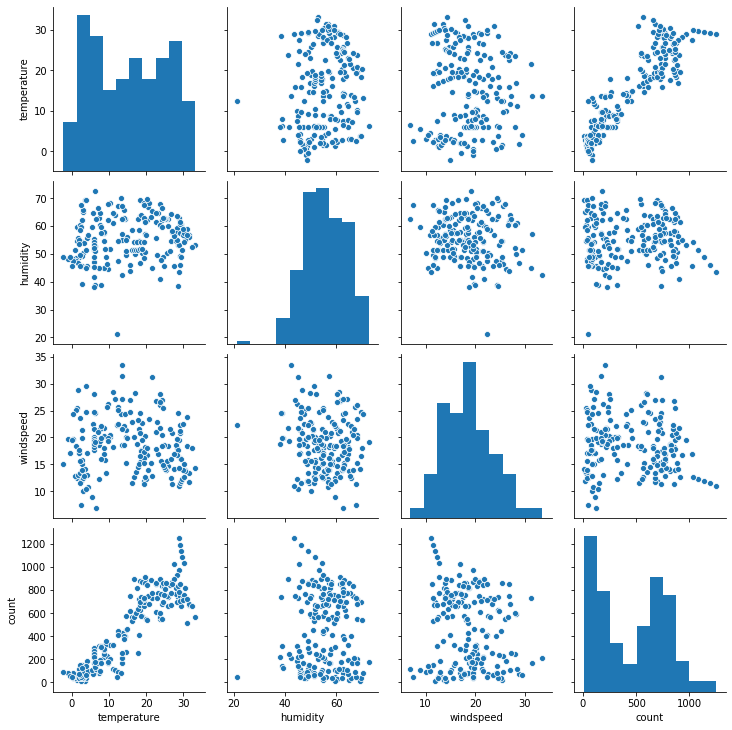

In [17]:
sns.pairplot(df)

In [18]:
#seperating into input and output variable
x=df.drop(columns=['count','date'])
x


,temperature,humidity,windspeed
0,2.716070,45.715346,21.414957
1,2.896673,54.267219,15.136882
2,4.235654,45.697702,17.034578
3,3.112643,50.237349,10.091568
4,2.723918,49.144928,15.738204
...,...,...,...
186,28.187490,63.618656,19.761499
187,29.070524,61.346450,21.121738
188,29.953558,59.074244,22.481976
189,30.836592,56.802038,23.842215


In [19]:
y =df.iloc[:,-1]
y

0      120.000000
1      108.000000
2       82.000000
3       88.000000
4      148.000000
          ...    
186    692.000000
187    702.333333
188    712.666667
189    723.000000
190    662.000000
Name: count, Length: 191, dtype: float64

In [20]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x1= sc.fit_transform(x)
x1=pd.DataFrame(x1,columns=x.columns)

In [21]:
#let's check the skewness
x1.skew()

temperature    0.053735
humidity      -0.417698
windspeed      0.341381
dtype: float64

Observation: skewness is correct after passing it through standard scaler

In [22]:
#Here we will find out the random state value with which our linear model will learn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
max_r_score=0
for r_state in range(42,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max_r2_score corresponding to",final_r_state,"is",max_r_score)
        

max_r2_score corresponding to 88 is 0.9068265759551853


In [34]:
#Lets use cross val score function to check above is overfitting or not
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x1,y,cv=5,scoring="r2").mean()
a_score

-1.3420349056530674

In [24]:
#Lets make our final model
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=88,test_size=0.20)
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)

In [25]:
#lets find the rmse and r2_score using sklearn.metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('RMSE is',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is:',r2_score(y_test,y_pred))

RMSE is 95.32465795102233
r2_score is: 0.9068265759551853


In [26]:
#lets use grid_search to find optimal value of n_neighbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x1,y)
gknr.best_params_

{'n_neighbors': 2}

In [27]:
#importing algorithms
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [35]:
#finding best parameter for RandomForestRegressor by using gridsearch cv

def Grid_Search_CV_RFR(x_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(x_train, y_train)

    return grid.best_score_ , grid.best_params_

In [36]:
def RFR(x_train, x_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(x_train,y_train)
    y_predict = estimator.predict(x_test)
    print ("R2 score:",r2_score(y_test,y_predict))
    return y_test,y_predict

In [37]:
for i in range(5):
    print ("Loop: " , i)
    print ("--------------") 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    best_score, best_params = Grid_Search_CV_RFR(x_train, y_train)
    y_test , y_predict = RFR(x_train, x_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------
R2 score: 0.8145142168741594
Best Score: 0.89788242283313
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  1
--------------
R2 score: 0.826104241243934
Best Score: 0.8575382948228858
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 20}
Loop:  2
--------------
R2 score: 0.8389413976404643
Best Score: 0.8714160157679374
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 30}
Loop:  3
--------------
R2 score: 0.9078780666101443
Best Score: 0.8654492614206486
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 20}
Loop:  4
--------------
R2 score: 0.8362127659645467
Best Score: 0.8852016307898081
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 30}


In [38]:
#finding best parameter for svr by using Gridsearch cv
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
parameters={'kernel':('linear','poly','rbf','sigmoid'),'C':[1,10]}
svr=SVR()
clf=GridSearchCV(svr,parameters)
clf.fit(x1,y)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

-1.4296163720691903
linear
{'C': 10, 'kernel': 'linear'}


In [41]:

dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)


param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(x1,y)
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::-2.133113007136333
Best Hyperparameters::
{'criterion': 'mae', 'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [49]:
#finding best parameter for adaboost by using grid search cv
from sklearn.ensemble import AdaBoostRegressor
n_estimators={"n_estimators":range(1,30)}
ad=AdaBoostRegressor()
gad=GridSearchCV(ad,n_estimators,cv=10)
gad.fit(x1,y)
gad.best_params_

{'n_estimators': 8}

In [54]:
#applying for loop for all the models
from sklearn.linear_model import LinearRegression
knr=KNeighborsRegressor(n_neighbors=2)
svr=SVR(C= 10, kernel= 'linear')
lr=LinearRegression()
dtr=DecisionTreeRegressor(criterion= 'mae', max_depth= 6, max_leaf_nodes= 20, min_samples_leaf= 20, min_samples_split= 10)
rfr=RandomForestRegressor()
ad=AdaBoostRegressor(n_estimators=8)

In [55]:
models=[]
models.append(('KNeighborsRegressor',knr))
models.append(('SupportVectorMachine',svr))
models.append(('LinearRegressor',lr))
models.append(('DecisionTreeRegressor',dtr))
models.append(('RandomForestRegressor',rfr))
models.append(('AdaBoostRegressor',ad))

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [84]:
Model=[]
sco=[]
r2score=[]
cvs=[]

for name,model in models:
    print('************',name,'************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train) 
    
    print(model)
    score=model.score(x_train,y_train)
    score1=score.mean()
    pre=model.predict(x_test)
    print('\n')    
    sco.append(score1)
    print('score:',score1)
    MSE=mean_squared_error(y_test,pre)
    print('mean squared error',MSE)
    MAE=mean_absolute_error(y_test,pre)
    print('mean absolute error',MAE)
    R2score= r2_score(y_test,pre)
    print('r2_score',R2score)
    r2score.append(R2score*100)
    print('\n')
    sc=cross_val_score(model,x1,y,cv=10).mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
    

************ KNeighborsRegressor ************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')


score: 0.9621021656711958
mean squared error 12432.891159188033
mean absolute error 91.50106837606839
r2_score 0.8726144484148605


Cross_Val_Score= -1.0175809033663206


************ SupportVectorMachine ************


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


score: 0.8452132306377882
mean squared error 29445.395647175043
mean absolute error 130.50384503335195
r2_score 0.6983068605578443


Cross_Val_Score= -0.8446982260797992


************ LinearRegressor ************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


score: 0.8505913964700016
mean squared error 29944.432483706634
mean absolute error 133.4907368

In [86]:
result=pd.DataFrame({'Model':Model,'score':sco,'R2_score':r2score,'Cross_val_score':cvs})
result

,Model,score,R2_score,Cross_val_score
0,KNeighborsRegressor,0.962102,87.261445,-101.758090
1,SupportVectorMachine,0.845213,69.830686,-84.469823
2,LinearRegressor,0.850591,69.319380,-94.606184
3,DecisionTreeRegressor,0.883753,79.607774,-33.640003
4,RandomForestRegressor,0.985188,86.130320,-23.520926
5,AdaBoostRegressor,0.930026,84.695562,-21.180221


Observation: On observing the given models we get to know that KNeighborsRegressor has good result as compare to other. So we can finalize this model.

In [69]:
#saving the model
from sklearn.externals import joblib
joblib.dump(knr,'bike.pkl')


['bike.pkl']